In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("seaborn-v0_8-whitegrid")

num_individuals_per_type = [30000, 20000, 6000, 10000, 6000, 4000, 1800, 1200, 1000]
num_types = len(num_individuals_per_type)
total_individuals = sum(num_individuals_per_type)
grid_size = (400, 400)
seed = 5464567
rng = np.random.default_rng(seed)

def rand_jitter(arr):
    stdev = .000005 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [2]:
rs = [1,1,3,2,3,4,5,6,6]
def create_random_clusters(grid_size, types_count, num_individuals_per_type):
    clusters = {type_id: [] for type_id in range(1, types_count + 1)}
    occupied_locations = set()
    
    for type_id in range(1, types_count + 1):
        locations_remaining = num_individuals_per_type[type_id - 1]
        
        while locations_remaining > 0:
            # Randomly determine the size of the next cluster
            cluster_size = min(locations_remaining, rng.integers(num_individuals_per_type[type_id - 1]/1000, num_individuals_per_type[type_id - 1]/50))  # assuming clusters are at most 100 locations
            
            # Generate random clusters using make_blobs
            center = rng.uniform(0, [grid_size[0], grid_size[1]], size=(1, 2))
            cluster, _ = make_blobs(n_samples=cluster_size, centers=center, cluster_std=((-0.000013574*(cluster_size**2)) + (0.0180034*cluster_size) + 0.920899), random_state=seed)
            cluster = np.round(cluster).astype(int)
            
            for point in cluster:
                if locations_remaining <= 0:
                    break
                x, y = point
                    
                # Create a tuple for the point
                point_tuple = (x%grid_size[0], y%grid_size[1])
                
                # Add the point to the list if it is not already occupied
                if point_tuple not in occupied_locations:
                    clusters[type_id].append(point_tuple)
                    occupied_locations.add(point_tuple)
                    locations_remaining -= 1

    # Flatten the clusters dictionary into a single list of locations
    all_locations = {}
    for type_id in range(1, types_count + 1):
        all_locations[type_id-1] = clusters[type_id]
    
    return all_locations

def create_random_locations(grid_size, types_count, num_individuals_per_type):
    locations = {}
    for type_id in range(types_count):
        locs = []
        for _ in range(num_individuals_per_type[type_id]):
            x = rng.integers(0, grid_size[0])
            y = rng.integers(0, grid_size[1])
            locs.append([x, y])
        
        locations[type_id] = locs
    return locations
    

# Create the clusters
clustered_locations_dict = create_random_clusters(grid_size, num_types, num_individuals_per_type)
clustered_locations_list = []
for type_id in range(len(clustered_locations_dict.keys())):
        clustered_locations_list.extend(clustered_locations_dict[type_id])
clustered_locations = np.array(clustered_locations_list)

random_locations_dict = create_random_locations(grid_size, num_types, num_individuals_per_type)
random_locations_list = []
for type_id in range(len(random_locations_dict.keys())):
        random_locations_list.extend(random_locations_dict[type_id])
random_locations = np.array(random_locations_list)

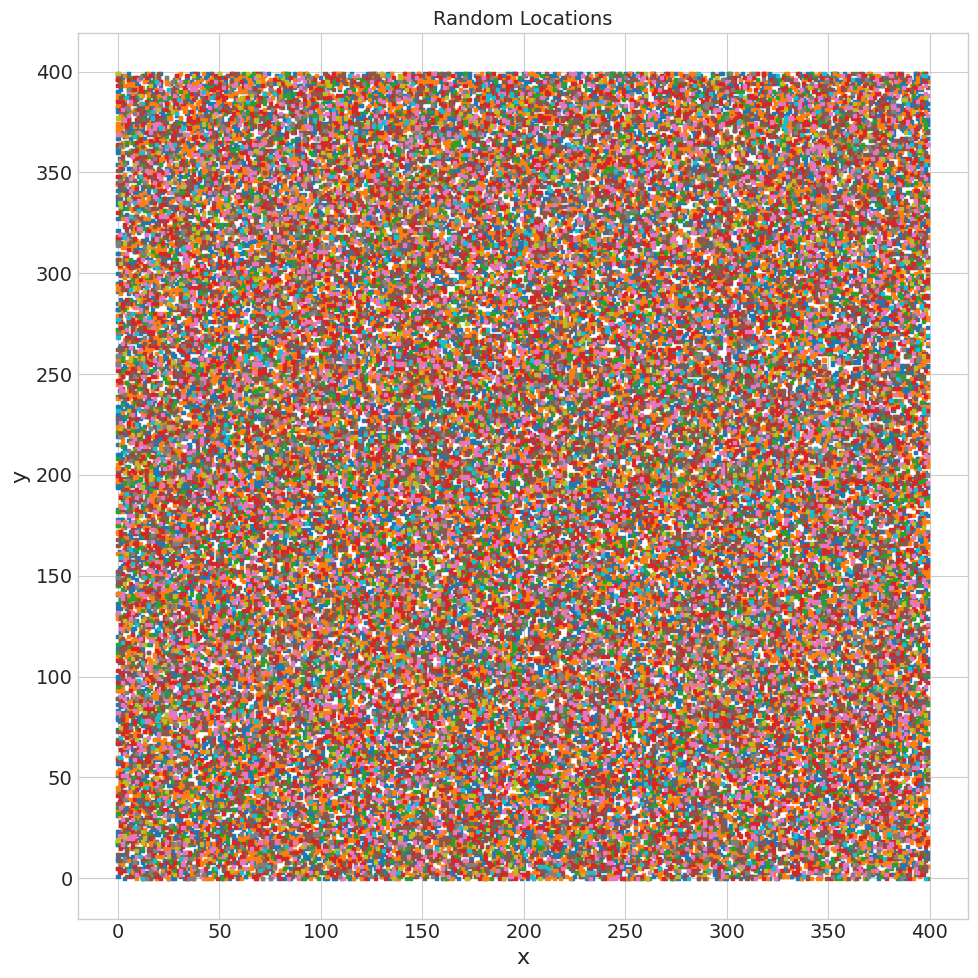

In [3]:
# Create a list of colors for each type
colors = plt.colormaps['tab10']

# Determine the type of each individual based on their index
types = []
start_index = np.zeros(num_types, dtype=int)
start_index[1:] = np.cumsum(num_individuals_per_type[:-1])
for i in range(num_types):
    types.extend([i] * num_individuals_per_type[i])
types = np.array(types)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.scatter(rand_jitter(random_locations[:, 0]), rand_jitter(random_locations[:, 1]), c=types, cmap=colors, s=5, marker='s')
ax.set_title(f'Random Locations')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.tight_layout()
#plt.savefig("random_init_z_5.pdf", format="pdf", bbox_inches="tight")
plt.show()

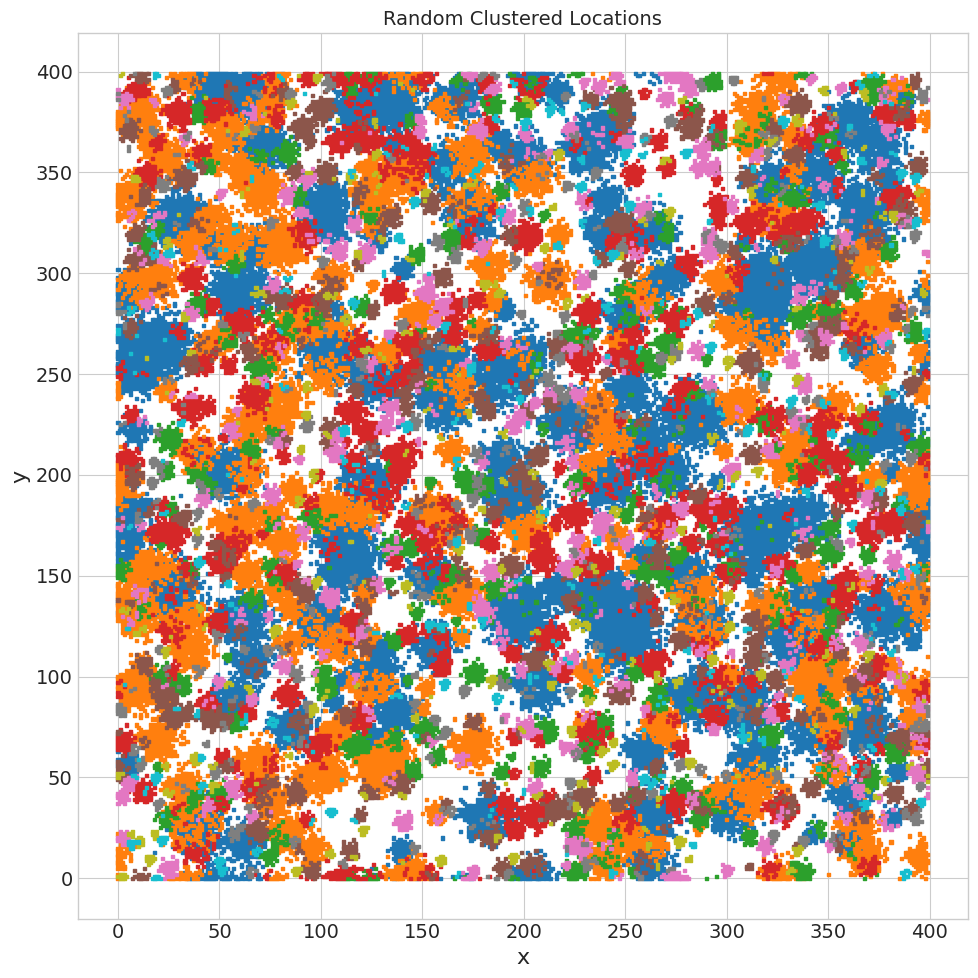

In [4]:
# Create a list of colors for each type
colors = plt.colormaps['tab10']

# Determine the type of each individual based on their index
types = []
start_index = np.zeros(num_types, dtype=int)
start_index[1:] = np.cumsum(num_individuals_per_type[:-1])
for i in range(num_types):
    types.extend([i] * num_individuals_per_type[i])
types = np.array(types)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.scatter(rand_jitter(clustered_locations[:, 0]), rand_jitter(clustered_locations[:, 1]), c=types, cmap=colors, s=5, marker='s')
ax.set_title(f'Random Clustered Locations')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.tight_layout()
#plt.savefig("clustered_init_z_5.pdf", format="pdf", bbox_inches="tight")
plt.show()

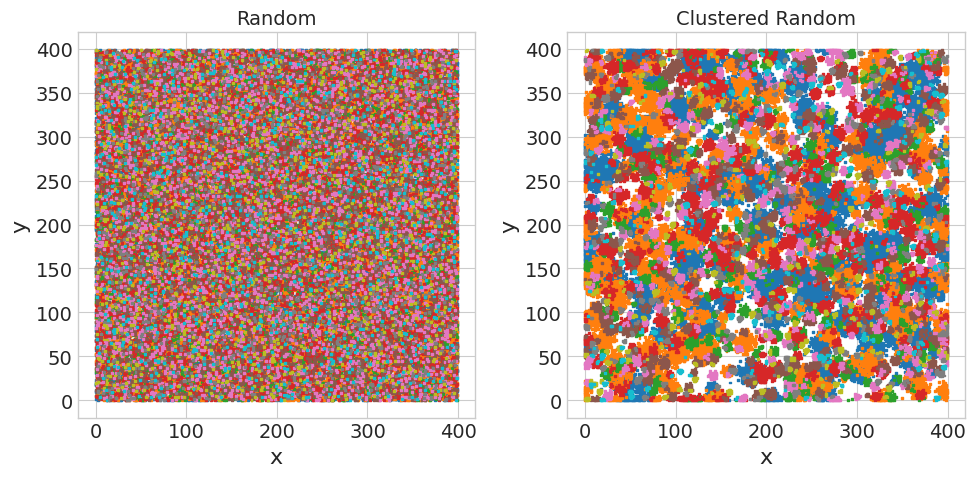

In [5]:
fig = plt.figure(figsize=(10, 5))
(ax1, ax2) = fig.subplots(1, 2)

# Create a list of colors for each type
#colors = plt.colormaps['Pastel1']
colors = plt.colormaps['tab10']

# Determine the type of each individual based on their index
types = []
start_index = np.zeros(num_types, dtype=int)
start_index[1:] = np.cumsum(num_individuals_per_type[:-1])
for i in range(num_types):
    types.extend([i] * num_individuals_per_type[i])
types = np.array(types)

ax1.scatter(rand_jitter(random_locations[:, 0]), rand_jitter(random_locations[:, 1]), c=types, cmap=colors, s=2, marker='s')
ax1.set_title(f'Random')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.scatter(rand_jitter(clustered_locations[:, 0]), rand_jitter(clustered_locations[:, 1]), c=types, cmap=colors, s=2, marker='s')
ax2.set_title(f'Clustered Random')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.savefig("4-initial_locations.png", format="png", bbox_inches="tight")
plt.show()

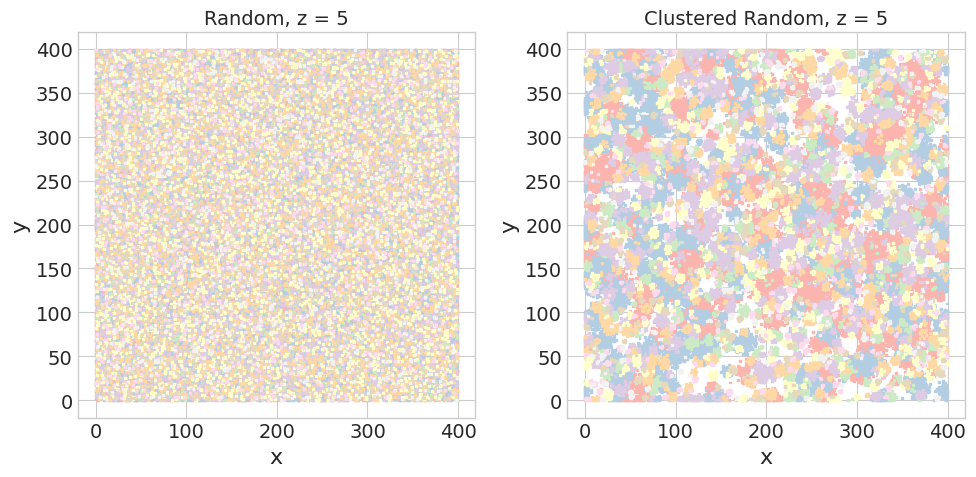

In [6]:
fig = plt.figure(figsize=(10, 5))
(ax1, ax2) = fig.subplots(1, 2)

# Create a list of colors for each type
colors = plt.colormaps['Pastel1']

# Determine the type of each individual based on their index
types = []
start_index = np.zeros(num_types, dtype=int)
start_index[1:] = np.cumsum(num_individuals_per_type[:-1])
for i in range(num_types):
    types.extend([i] * num_individuals_per_type[i])
types = np.array(types)

ax1.scatter(rand_jitter(random_locations[:, 0]), rand_jitter(random_locations[:, 1]), c=types, cmap=colors, s=2, marker='s')
ax1.set_title(f'Random, z = 5')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.scatter(rand_jitter(clustered_locations[:, 0]), rand_jitter(clustered_locations[:, 1]), c=types, cmap=colors, s=2, marker='s')
ax2.set_title(f'Clustered Random, z = 5')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
#plt.savefig("4-initial_locations_pastel.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [7]:

import pickle 

with open('clustered_locations_1.pkl', 'wb') as f:
    pickle.dump(clustered_locations_dict, f)

with open('random_locations_1.pkl', 'wb') as f:
    pickle.dump(random_locations_dict, f)